In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
df = pd.read_csv('../data/combined_reddit.csv')

In [169]:
df.head()

,author,subreddit,cleantext,cleantitle
0,AutoModerator,soccer,a place to discuss everything except the engli...,non-pl daily discussion
1,Chapulana,soccer,NaN,[about the latest eca/uefa idea] psg want cham...
2,joaorsilva,soccer,NaN,[record] cristiano ronaldo says he will be at ...
3,klarstartpirat,soccer,NaN,jack grealish says english players get unfair ...
4,ImamZain,soccer,NaN,[pearce] the battle for jude bellingham… dortm...


In [170]:
df.fillna('', inplace = True)
df

,author,subreddit,cleantext,cleantitle
0,AutoModerator,soccer,a place to discuss everything except the engli...,non-pl daily discussion
1,Chapulana,soccer,,[about the latest eca/uefa idea] psg want cham...
2,joaorsilva,soccer,,[record] cristiano ronaldo says he will be at ...
3,klarstartpirat,soccer,,jack grealish says english players get unfair ...
4,ImamZain,soccer,,[pearce] the battle for jude bellingham… dortm...
...,...,...,...,...
7973,AdamMitchellWheyyyy,FIFA,"hey all\n\nas per the title, my connection is ...",severe connection issues
7974,Access_Kind,FIFA,i am seeking advice on possible players to get...,why are we not allowed to post out fut screens...
7975,YakCarlo,FIFA,,fut 19 toty kit for anyone who wants a classy ...
7976,Access_Kind,FIFA,,need advice on my ligue 1 fut


In [171]:
#lengths of description and titles
df['text_length'] = [len(i) for i in df['cleantext']]
df['title_length'] = [len(i) for i in df['cleantitle']]
df

,author,subreddit,cleantext,cleantitle,text_length,title_length
0,AutoModerator,soccer,a place to discuss everything except the engli...,non-pl daily discussion,64,23
1,Chapulana,soccer,,[about the latest eca/uefa idea] psg want cham...,0,90
2,joaorsilva,soccer,,[record] cristiano ronaldo says he will be at ...,0,93
3,klarstartpirat,soccer,,jack grealish says english players get unfair ...,0,55
4,ImamZain,soccer,,[pearce] the battle for jude bellingham… dortm...,0,194
...,...,...,...,...,...,...
7973,AdamMitchellWheyyyy,FIFA,"hey all\n\nas per the title, my connection is ...",severe connection issues,909,24
7974,Access_Kind,FIFA,i am seeking advice on possible players to get...,why are we not allowed to post out fut screens...,111,51
7975,YakCarlo,FIFA,,fut 19 toty kit for anyone who wants a classy ...,0,62
7976,Access_Kind,FIFA,,need advice on my ligue 1 fut,0,29


In [172]:
#number of words in description and titles
df['text_word_count'] = [len(i.split()) for i in df['cleantext']]
df['title_word_count'] = [len(i.split()) for i in df['cleantitle']]
df

,author,subreddit,cleantext,cleantitle,text_length,title_length,text_word_count,title_word_count
0,AutoModerator,soccer,a place to discuss everything except the engli...,non-pl daily discussion,64,23,10,3
1,Chapulana,soccer,,[about the latest eca/uefa idea] psg want cham...,0,90,0,14
2,joaorsilva,soccer,,[record] cristiano ronaldo says he will be at ...,0,93,0,17
3,klarstartpirat,soccer,,jack grealish says english players get unfair ...,0,55,0,8
4,ImamZain,soccer,,[pearce] the battle for jude bellingham… dortm...,0,194,0,31
...,...,...,...,...,...,...,...,...
7973,AdamMitchellWheyyyy,FIFA,"hey all\n\nas per the title, my connection is ...",severe connection issues,909,24,166,3
7974,Access_Kind,FIFA,i am seeking advice on possible players to get...,why are we not allowed to post out fut screens...,111,51,22,10
7975,YakCarlo,FIFA,,fut 19 toty kit for anyone who wants a classy ...,0,62,0,13
7976,Access_Kind,FIFA,,need advice on my ligue 1 fut,0,29,0,7


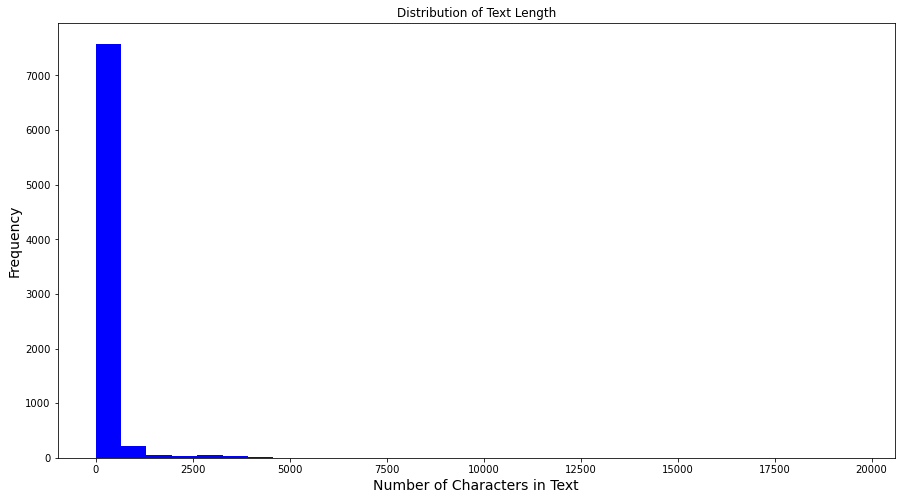

In [173]:
plt.figure(figsize = (15, 8))

plt.hist(df['text_length'],
         color = 'blue',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Text Length');
# Do we need axis lables here?
plt.xlabel("Number of Characters in Text", size = 14)
plt.ylabel("Frequency", size = 14);

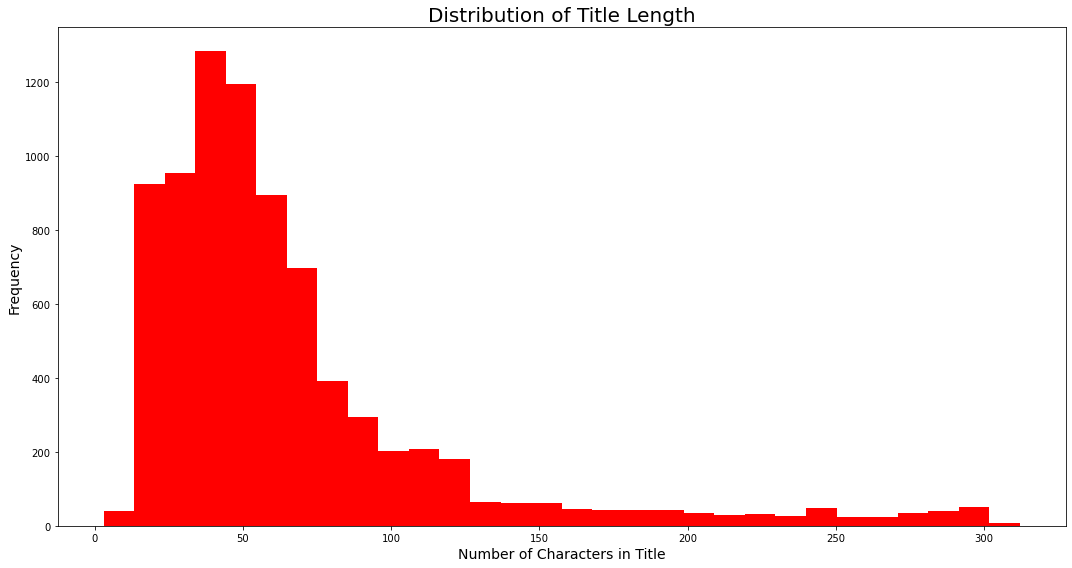

In [174]:
plt.figure(figsize = (15, 8))

plt.hist(df['title_length'],
         color = 'red',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Title Length', size = 20);
# Do we need axis lables here?
plt.xlabel("Number of Characters in Title", size = 14)
plt.ylabel("Frequency", size = 14)


plt.tight_layout()
plt.savefig('../images/distribution_title_length');

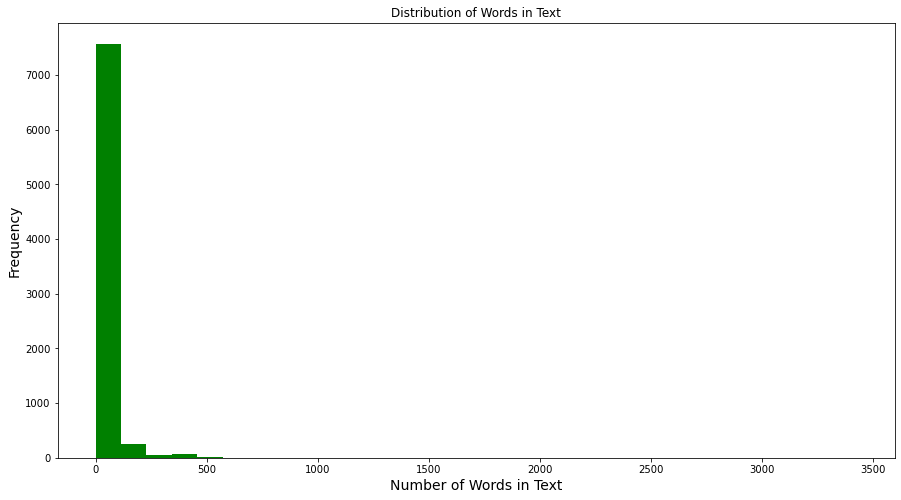

In [175]:
plt.figure(figsize = (15, 8))

plt.hist(df['text_word_count'],
         color = 'green',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Words in Text');
# Do we need axis lables here?
plt.xlabel("Number of Words in Text", size = 14)
plt.ylabel("Frequency", size = 14);

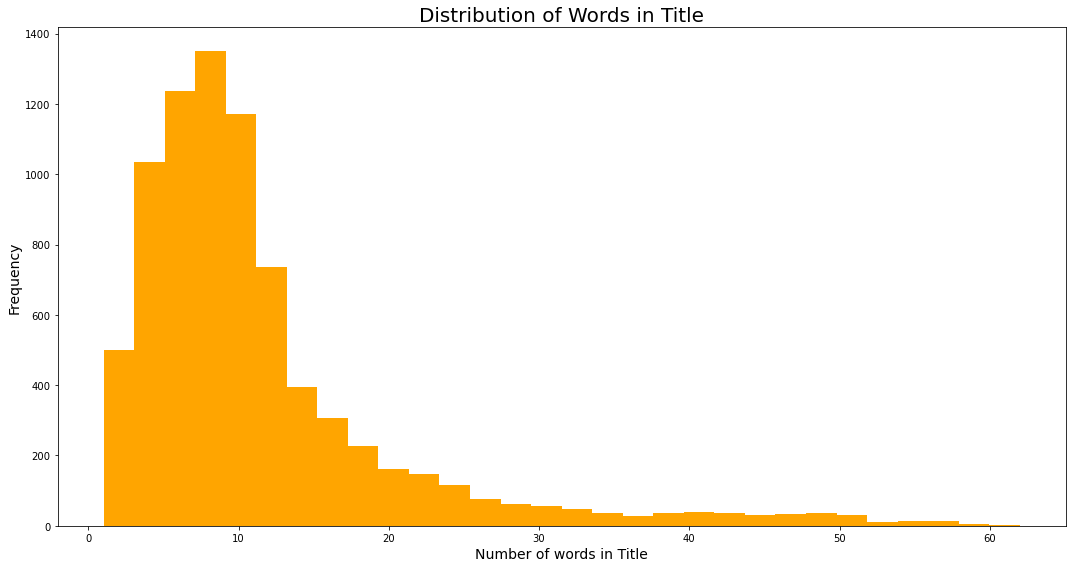

In [176]:
plt.figure(figsize = (15, 8))

plt.hist(df['title_word_count'],
         color = 'orange',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Words in Title', size = 20);
# Do we need axis lables here?
plt.xlabel("Number of words in Title", size = 14)
plt.ylabel("Frequency", size = 14)

plt.tight_layout()
plt.savefig('../images/distribution_words');

There are a couple of observations in text length and word count that are way higher than the others and throw off our distributions a bit. The length and words of the titles appear to be much closer.

In [177]:
df.sort_values('text_length').tail(20)

,author,subreddit,cleantext,cleantitle,text_length,title_length,text_word_count,title_word_count
1201,suedney,soccer,#**ft: arminia bielefeld [4-2](#bar-3-white) ...,post match thread: arminia bielefeld 4-2 holst...,3925,77,488,12
1734,BuzzBuzz01,soccer,#**90'+3': fc midtjylland [5-1](#bar-3-white)...,post match thread: fc midtjylland 5-1 lazio | ...,3942,64,489,11
737,EasyModeActivist,soccer,\n\n#**ft: psv eindhoven [4-3](#bar-3-white) ...,post match thread: psv eindhoven 4-3 feyenoord...,4082,75,509,11
736,BuzzBuzz01,soccer,#**90'+5': psv eindhoven [4-3](#bar-3-white) ...,post match thread: psv eindhoven 4-3 feyenoord...,4084,75,509,11
2949,Samkazi23,soccer,#**ft': juventus [2-2](#bar-3-white) salerni...,post match thread: juventus 2 vs 2 salernitana...,4112,64,488,12
3122,LampseederBroDude51,soccer,\n#**ft: real madrid [4-1](#bar-3-white) mal...,post match thread: real madrid 4-1 rcd mallorc...,4114,70,528,13
1025,mister_greenman,soccer,#**ft: tottenham hotspur [6-2](#bar-3-white) ...,[post match thread] tottenham hotspur 6-2 leic...,4195,81,526,12
1028,Rancheros,soccer,#**90'+3': tottenham hotspur [6-2](#bar-3-whi...,post-match thread: tottenham hotspur 6 - 2 lei...,4199,74,526,12
1725,BuzzBuzz01,soccer,#**90'+1': feyenoord rotterdam [6-0](#bar-3-w...,post match thread: feyenoord 6-0 sturm graz | ...,4280,64,532,11
5352,Necessary-Border-413,FIFA,please share if it is something you have exper...,my public letter to ea sports fifa,4336,34,803,7


In [178]:
#unique authors
pd.unique(df['author']).shape[0]

4201

In [179]:
unique_users = df.drop_duplicates(subset = ['author'])
print(unique_users.shape)
unique_users.head()

(4201, 8)


,author,subreddit,cleantext,cleantitle,text_length,title_length,text_word_count,title_word_count
0,AutoModerator,soccer,a place to discuss everything except the engli...,non-pl daily discussion,64,23,10,3
1,Chapulana,soccer,,[about the latest eca/uefa idea] psg want cham...,0,90,0,14
2,joaorsilva,soccer,,[record] cristiano ronaldo says he will be at ...,0,93,0,17
3,klarstartpirat,soccer,,jack grealish says english players get unfair ...,0,55,0,8
4,ImamZain,soccer,,[pearce] the battle for jude bellingham… dortm...,0,194,0,31


In [180]:
unique_users.sort_values('text_length').tail(5)

,author,subreddit,cleantext,cleantitle,text_length,title_length,text_word_count,title_word_count
163,quatrotires,soccer,"""these posts are as much for me as they are fo...",what to watch this week (26-2 october),4947,38,687,7
2116,McWaffeleisen,soccer,"hello max,\n\nit's not official yet, but the n...",gladbach fans'open letter to their former dof ...,5088,289,897,51
8,wisakoy,soccer,credit to u/boskee for translating article on ...,lewandowski on game against bayern: i had to c...,6209,243,1135,43
326,Vicribator,soccer,hello everyone. i've been wanting to write abo...,[oc] how to call the football teams from spain,8096,46,1334,9
162,FribonFire,soccer,*processing video p6ihz11ni0p91...* *the quick...,le sifflet final - ligue 1 matchday 8 - j'chan...,10086,107,1499,20


In [181]:
unique_users.sort_values('text_word_count').tail(5)

,author,subreddit,cleantext,cleantitle,text_length,title_length,text_word_count,title_word_count
1807,manchesthairy,soccer,i feel bad for all the young ones who never sa...,maradona - the greatest of all time,4802,35,846,7
2116,McWaffeleisen,soccer,"hello max,\n\nit's not official yet, but the n...",gladbach fans'open letter to their former dof ...,5088,289,897,51
8,wisakoy,soccer,credit to u/boskee for translating article on ...,lewandowski on game against bayern: i had to c...,6209,243,1135,43
326,Vicribator,soccer,hello everyone. i've been wanting to write abo...,[oc] how to call the football teams from spain,8096,46,1334,9
162,FribonFire,soccer,*processing video p6ihz11ni0p91...* *the quick...,le sifflet final - ligue 1 matchday 8 - j'chan...,10086,107,1499,20


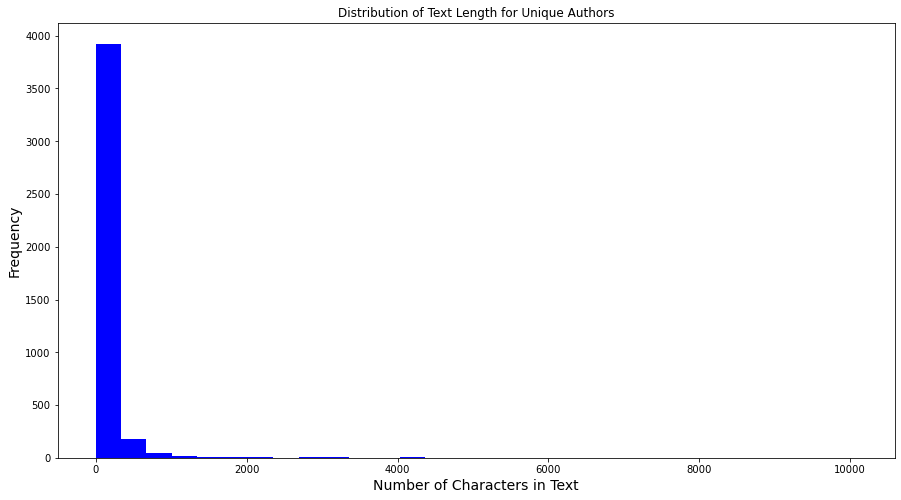

In [182]:
#drop those outlier values
plt.figure(figsize = (15, 8))

plt.hist(unique_users['text_length'],
         color = 'blue',
         bins = 30)

# Create a descriptive title
plt.title('Distribution of Text Length for Unique Authors');
# Do we need axis lables here?
plt.xlabel("Number of Characters in Text", size = 14)
plt.ylabel("Frequency", size = 14);

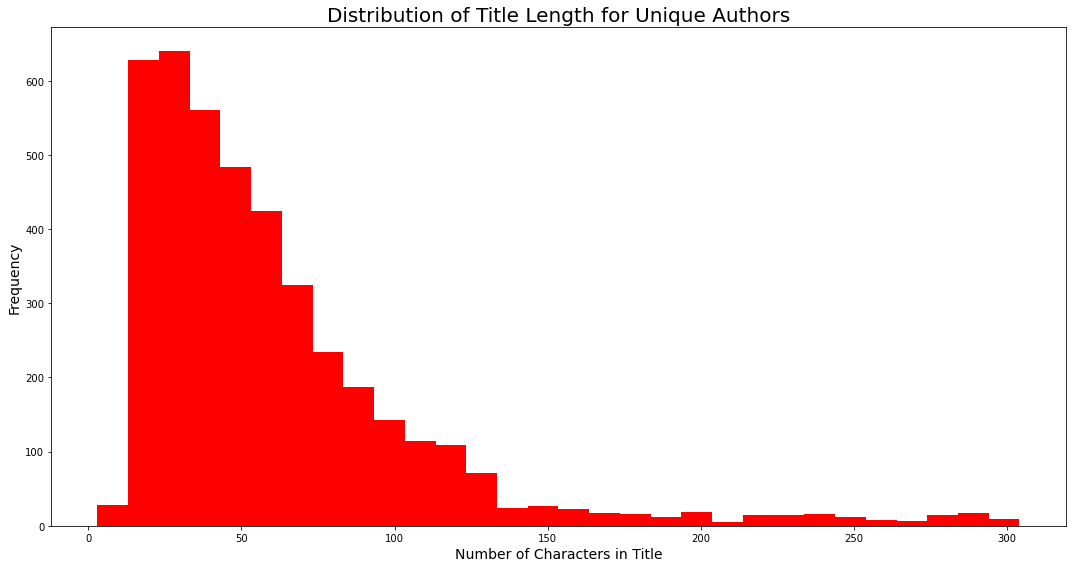

In [183]:
plt.figure(figsize = (15, 8))

plt.hist(unique_users['title_length'],
         color = 'red',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Title Length for Unique Authors', size = 20)
# Do we need axis lables here?
plt.xlabel("Number of Characters in Title", size = 14)
plt.ylabel("Frequency", size = 14)

plt.tight_layout()
plt.savefig('../images/distribution_title_length_unique_authors');

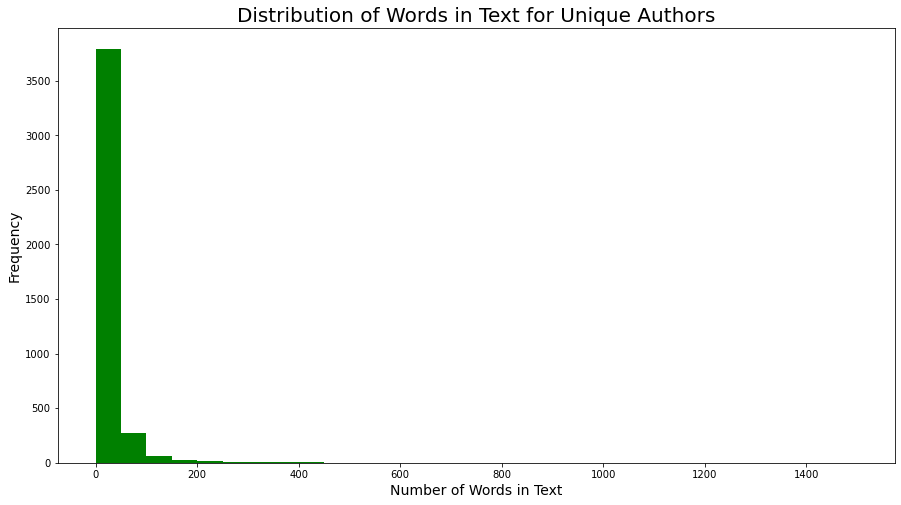

In [184]:
plt.figure(figsize = (15, 8))

plt.hist(unique_users['text_word_count'],
         color = 'green',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Words in Text for Unique Authors', size = 20);
# Do we need axis lables here?
plt.xlabel("Number of Words in Text", size = 14)
plt.ylabel("Frequency", size = 14);

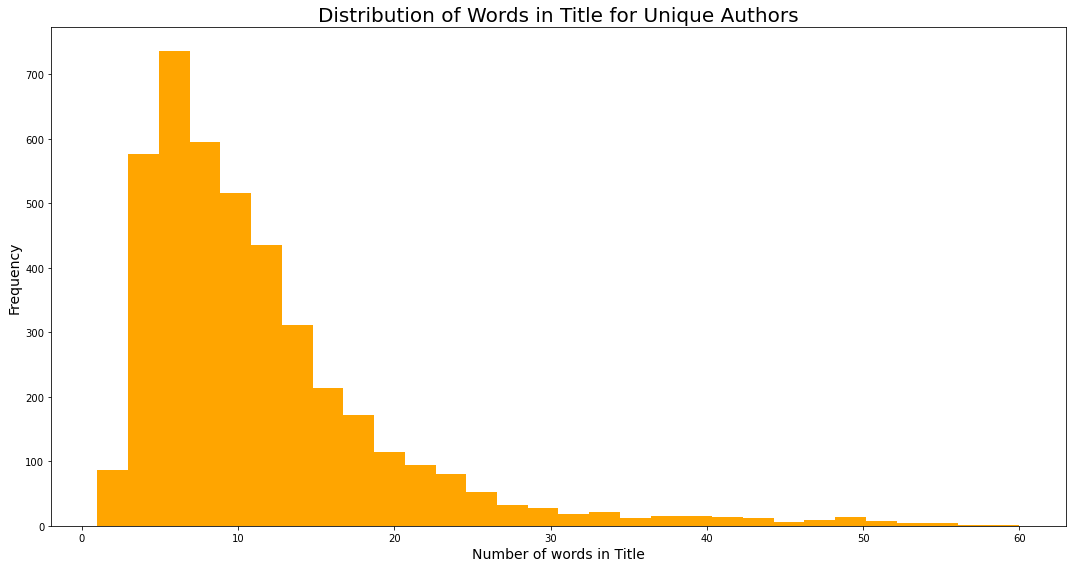

In [185]:
plt.figure(figsize = (15, 8))

plt.hist(unique_users['title_word_count'],
         color = 'orange',
        bins = 30)

# Create a descriptive title
plt.title('Distribution of Words in Title for Unique Authors', size = 20)
# Do we need axis lables here?
plt.xlabel("Number of words in Title", size = 14)
plt.ylabel("Frequency", size = 14)

plt.tight_layout()
plt.savefig('../images/distribution_words_unique_authors');

In [186]:
unique_users.describe()

,text_length,title_length,text_word_count,title_word_count
count,4201.000000,4201.000000,4201.000000,4201.000000
mean,94.379910,61.285408,16.649369,11.121162
std,380.257532,47.625465,60.331640,8.353376
min,0.000000,3.000000,0.000000,1.000000
25%,0.000000,30.000000,0.000000,6.000000
50%,0.000000,49.000000,0.000000,9.000000
75%,58.000000,75.000000,11.000000,14.000000
max,10086.000000,304.000000,1499.000000,60.000000


In [187]:
cvec = CountVectorizer()
countvector = cvec.fit_transform(df['cleantext'])
countvector.todense()
allwords = pd.DataFrame(countvector.todense(), 
                          columns=cvec.get_feature_names_out())
allwords.sum().T.sort_values(ascending = False).head(15)

the      5352
to       3498
icon     2677
and      2262
for      1645
of       1605
is       1589
it       1481
sub      1470
in       1300
on       1168
you      1149
this     1063
match    1057
that      935
dtype: int64

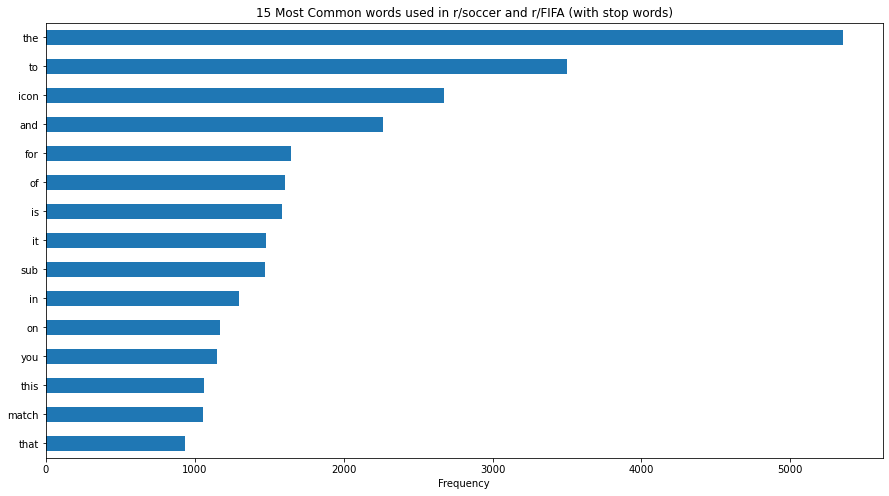

In [188]:
plt.figure(figsize = (15, 8))
allwords.sum().T.sort_values(ascending = True).tail(15).plot.barh()
plt.title('15 Most Common words used in r/soccer and r/FIFA (with stop words)')
plt.xlabel('Frequency');

In [189]:
cvec2 = CountVectorizer(stop_words='english')
countvector2 = cvec2.fit_transform(df['cleantext'])
countvector2.todense()
allwords2 = pd.DataFrame(countvector2.todense(), 
                          columns=cvec2.get_feature_names_out())
allwords2.sum().T.sort_values(ascending = False).head(15)

icon            2677
sub             1470
match           1057
com              910
reddit           880
www              840
substitution     839
replaces         838
fifa             833
yellow           793
soccer           652
big              581
comments         578
game             564
https            559
dtype: int64

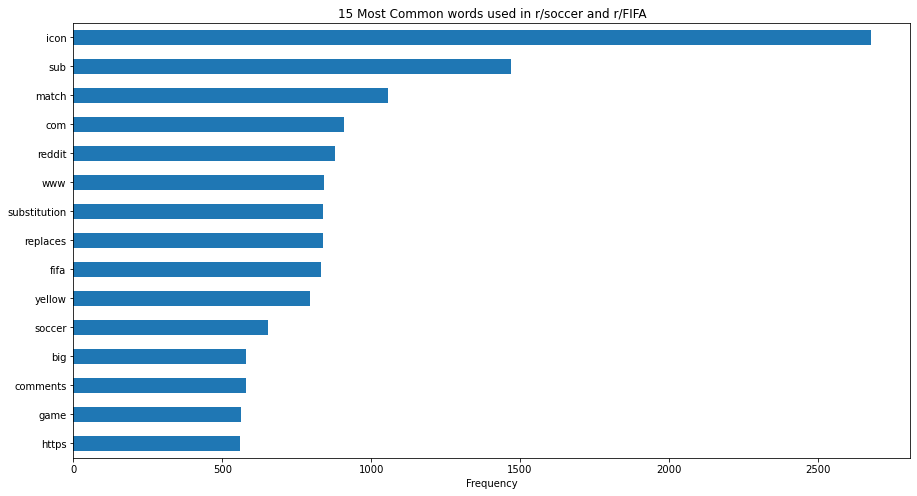

In [190]:
plt.figure(figsize = (15, 8))
allwords2.sum().T.sort_values(ascending = True).tail(15).plot.barh()
plt.title('15 Most Common words used in r/soccer and r/FIFA')
plt.xlabel('Frequency');

In [191]:
df.rename(columns = {'subreddit':'original_subreddit'}, inplace = True)
allwords_combined = pd.concat([df, allwords2], axis = 1, join = "outer")
allwords_combined.head()

,author,original_subreddit,cleantext,cleantitle,text_length,title_length,text_word_count,title_word_count,00,000,...,özkacar,özyakup,østigård,úmaro,ünal,ünder,čermák,štefulj,žugelj,𝗦𝗔𝗟𝗧𝗡𝗬
0,AutoModerator,soccer,a place to discuss everything except the engli...,non-pl daily discussion,64,23,10,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chapulana,soccer,,[about the latest eca/uefa idea] psg want cham...,0,90,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,joaorsilva,soccer,,[record] cristiano ronaldo says he will be at ...,0,93,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,klarstartpirat,soccer,,jack grealish says english players get unfair ...,0,55,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ImamZain,soccer,,[pearce] the battle for jude bellingham… dortm...,0,194,0,31,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#Most common words in FIFA posts
allwords_fifa = allwords_combined[allwords_combined['original_subreddit'] == 'FIFA']
allwords_fifa.drop(columns = df.columns).sum().T.sort_values(ascending = False).head(25)

fifa       833
game       535
just       476
play       425
players    344
like       325
23         288
know       274
player     240
ea         235
team       216
don        209
ve         208
time       205
pc         200
22         197
fut        180
new        177
want       173
amp        160
playing    157
got        157
buy        155
discord    153
year       150
dtype: int64

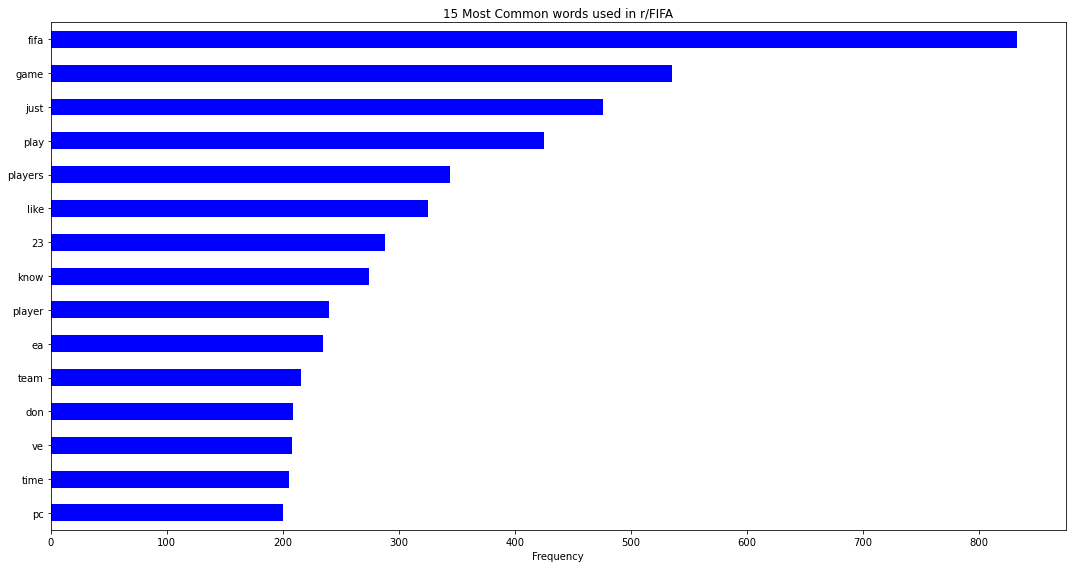

In [199]:
plt.figure(figsize = (15, 8))
allwords_fifa.drop(columns = df.columns).sum().T.sort_values(ascending = True).tail(15).plot.barh(color = 'b')
plt.title('15 Most Common words used in r/FIFA')
plt.xlabel('Frequency')

plt.tight_layout()
plt.savefig('../images/15_common_words_FIFA');

In [194]:
#Most common words in football posts
allwords_soccer = allwords_combined[allwords_combined['original_subreddit'] == 'soccer']
allwords_soccer.drop(columns = df.columns).sum().T.sort_values(ascending = False).head(25)

icon            2631
sub             1462
match           1015
com              886
reddit           875
substitution     839
replaces         838
www              830
yellow           790
soccer           648
comments         573
big              550
subs             507
espn             498
http             489
thread           465
card             436
fc               419
goal             414
https            414
shown            410
bar              342
vs               335
white            323
bad              318
dtype: int64

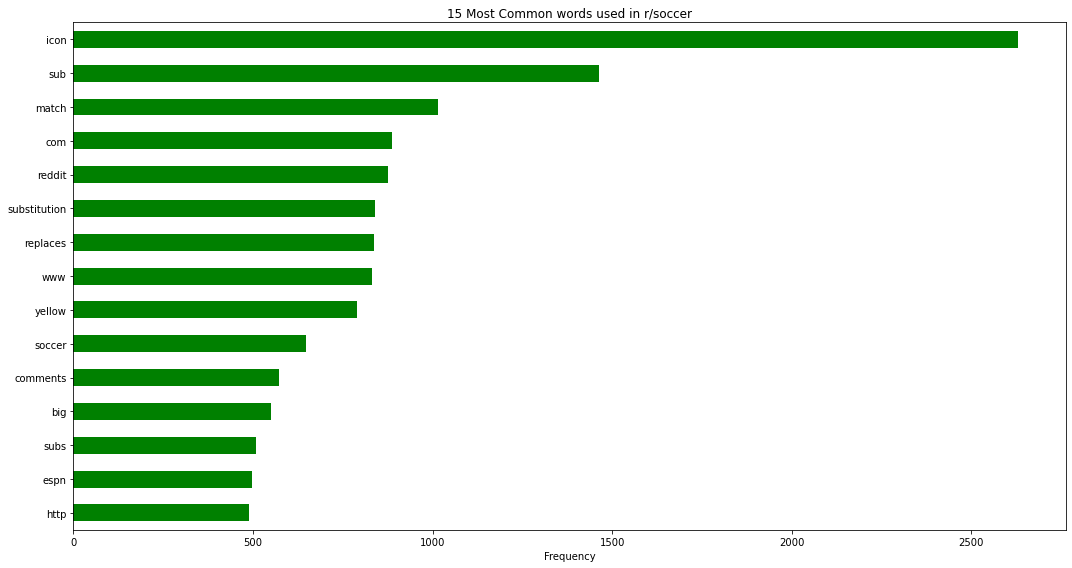

In [195]:
plt.figure(figsize = (15, 8))
allwords_soccer.drop(columns = df.columns).sum().T.sort_values(ascending = True).tail(15).plot.barh(color = 'g')
plt.title('15 Most Common words used in r/soccer')
plt.xlabel('Frequency')

plt.tight_layout()
plt.savefig('../images/15_common_words_soccer');